# ============================================================================
# NOTEBOOK 03: BASELINE MODEL TRAINING
# ============================================================================

## 🎯 Objective
Train a baseline model using TF-IDF + Logistic Regression to establish a performance benchmark for fake news detection.

## 📋 What we'll do:
1. **Load preprocessed data** from notebook 02
2. **Train baseline model** (TF-IDF + Logistic Regression)
3. **Evaluate performance** on train/val/test sets
4. **Visualize results** and create confusion matrix
5. **Save model** and results for comparison

---


In [5]:
# ============================================================================
# CELL 1: Imports and Setup
# ============================================================================
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Import from src
from src.config import DataConfig, PROCESSED_DATA_DIR, METRICS_DIR, VISUALIZATIONS_DIR, MODELS_DIR
from src.model import BaselineModel
from src.train import train_baseline_model
from src.evaluate import (
    evaluate_model, 
    plot_confusion_matrix, 
    plot_roc_curve,
    save_evaluation_results
)
from src.utils import save_json

# Set style
plt.style.use('default')
sns.set_palette("husl")

print("✅ Imports successful!")
print("📊 Ready to train baseline model!")


KeyboardInterrupt: 

In [ ]:
# ============================================================================
# CELL 2: Load Preprocessed Data
# ============================================================================
print("="*80)
print("LOADING PREPROCESSED DATA")
print("="*80)

# Load the processed datasets
train_df = pd.read_csv(DataConfig.TRAIN_PATH)
val_df = pd.read_csv(DataConfig.VAL_PATH)
test_df = pd.read_csv(DataConfig.TEST_PATH)

print(f"\n📊 Data loaded successfully!")
print(f"   Train set: {train_df.shape[0]:,} samples")
print(f"   Val set:   {val_df.shape[0]:,} samples")
print(f"   Test set:  {test_df.shape[0]:,} samples")

print(f"\n📋 Train set columns: {train_df.columns.tolist()}")
print(f"\n📝 Sample train data:")
print(train_df.head(3))

# Verify data integrity
print(f"\n🔍 Data verification:")
print(f"   Train - Real: {(train_df['label'] == 0).sum():,} ({(train_df['label'] == 0).mean()*100:.1f}%)")
print(f"   Train - Fake: {(train_df['label'] == 1).sum():,} ({(train_df['label'] == 1).mean()*100:.1f}%)")
print(f"   Missing values: {train_df.isnull().sum().sum()}")

# Verify imports
print(f"\n✅ Import verification:")
print(f"   MODELS_DIR: {MODELS_DIR}")
print(f"   METRICS_DIR: {METRICS_DIR}")
print(f"   VISUALIZATIONS_DIR: {VISUALIZATIONS_DIR}")


LOADING PREPROCESSED DATA

📊 Data loaded successfully!
   Train set: 95,244 samples
   Val set:   20,409 samples
   Test set:  20,410 samples

📋 Train set columns: ['content', 'label', 'cleaned_content']

📝 Sample train data:
                                             content  label  \
0  pilots are resigning from German Air Force – t...      1   
1  New evidence that the snipers that killed 49 p...      1   
2  It s bad enough that the Oscar s this year don...      1   

                                     cleaned_content  
0  pilots are resigning from german air force – t...  
1  new evidence that the snipers that killed 49 p...  
2  it s bad enough that the oscar s this year don...  

🔍 Data verification:
   Train - Real: 50,574 (53.1%)
   Train - Fake: 44,670 (46.9%)
   Missing values: 0


In [ ]:
# ============================================================================
# CELL 3: Train Baseline Model
# ============================================================================
print("="*80)
print("TRAINING BASELINE MODEL")
print("="*80)

# Import MODELS_DIR if not already imported
from src.config import MODELS_DIR

# Train the baseline model
baseline_results = train_baseline_model(
    train_df=train_df,
    val_df=val_df,
    test_df=test_df,
    save_path=MODELS_DIR / "baseline_model.pkl"
)

print("\n✅ Baseline model training completed!")
print(f"\n📊 Training Results Summary:")
print(f"   Training time: {baseline_results['training_time']:.2f} seconds")
print(f"   Test Accuracy: {baseline_results['test_metrics']['accuracy']:.4f}")
print(f"   Test F1-score: {baseline_results['test_metrics']['f1']:.4f}")
print(f"   Test ROC-AUC:  {baseline_results['test_metrics']['roc_auc']:.4f}")


INFO:src.train:================================================================================
INFO:src.train:TRAINING BASELINE MODEL
INFO:src.train:================================================================================
INFO:src.train:Training samples: 95244
INFO:src.train:Validation samples: 20409
INFO:src.train:Test samples: 20410
INFO:src.model:Training baseline model...
INFO:src.model:Baseline pipeline created with TF-IDF + Logistic Regression


TRAINING BASELINE MODEL


INFO:src.model:✅ Baseline model training completed
INFO:src.model:Validation accuracy: 0.8796
INFO:src.model:Baseline model saved to: d:\Fake_News_Detection_BERT\notebooks\..\models\baseline_model.pkl
INFO:src.train:✅ Baseline model training completed!
INFO:src.train:Training time: 512.49 seconds
INFO:src.train:Test accuracy: 0.8834
INFO:src.train:Test F1-score: 0.8834



✅ Baseline model training completed!

📊 Training Results Summary:
   Training time: 512.49 seconds
   Test Accuracy: 0.8834
   Test F1-score: 0.8834
   Test ROC-AUC:  0.9658


In [ ]:
# ============================================================================
# CELL 4: Detailed Evaluation
# ============================================================================
print("="*80)
print("DETAILED MODEL EVALUATION")
print("="*80)

# Extract predictions and probabilities
y_test_true = test_df['label'].values
y_test_pred = np.array(baseline_results['test_predictions'])
y_test_proba = np.array(baseline_results['test_probabilities'])

# Comprehensive evaluation
test_evaluation = evaluate_model(
    y_true=y_test_true,
    y_pred=y_test_pred,
    y_proba=y_test_proba,
    model_name="Baseline TF-IDF + LR"
)

print(f"\n📊 Detailed Test Results:")
for metric, value in test_evaluation.items():
    if isinstance(value, (int, float)):
        print(f"   {metric.capitalize()}: {value:.4f}")

# Print classification report
print(f"\n📋 Classification Report:")
print(classification_report(y_test_true, y_test_pred, target_names=['Real', 'Fake']))


INFO:src.evaluate:Evaluating Baseline TF-IDF + LR...
INFO:src.evaluate:✅ Baseline TF-IDF + LR evaluation completed:
INFO:src.evaluate:   Accuracy: 0.8834
INFO:src.evaluate:   Precision: 0.8836
INFO:src.evaluate:   Recall: 0.8834
INFO:src.evaluate:   F1-score: 0.8834
INFO:src.evaluate:   ROC AUC: 0.9658


DETAILED MODEL EVALUATION

📊 Detailed Test Results:
   Accuracy: 0.8834
   Precision: 0.8836
   Recall: 0.8834
   F1: 0.8834
   Roc_auc: 0.9658

📋 Classification Report:
              precision    recall  f1-score   support

        Real       0.90      0.88      0.89     10837
        Fake       0.87      0.88      0.88      9573

    accuracy                           0.88     20410
   macro avg       0.88      0.88      0.88     20410
weighted avg       0.88      0.88      0.88     20410



VISUALIZING MODEL PERFORMANCE


INFO:src.evaluate:Confusion matrix saved to: d:\Fake_News_Detection_BERT\notebooks\..\results\visualizations\baseline_confusion_matrix.png


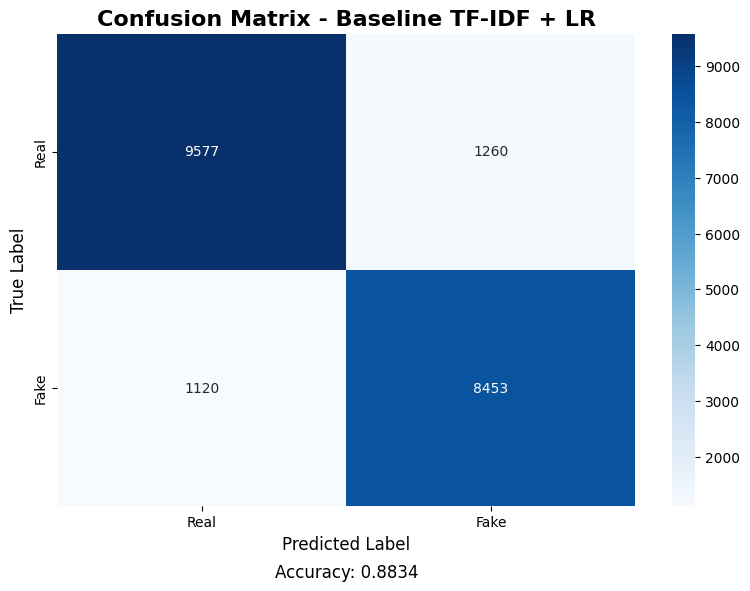


✅ Confusion matrix saved!


In [ ]:
# ============================================================================
# CELL 5: Visualization - Confusion Matrix
# ============================================================================
print("="*80)
print("VISUALIZING MODEL PERFORMANCE")
print("="*80)

# Create confusion matrix
plot_confusion_matrix(
    y_true=y_test_true,
    y_pred=y_test_pred,
    model_name="Baseline TF-IDF + LR",
    save_path=VISUALIZATIONS_DIR / "baseline_confusion_matrix.png"
)

print("\n✅ Confusion matrix saved!")


ROC CURVE ANALYSIS


INFO:src.evaluate:ROC curve saved to: d:\Fake_News_Detection_BERT\notebooks\..\results\visualizations\baseline_roc_curve.png


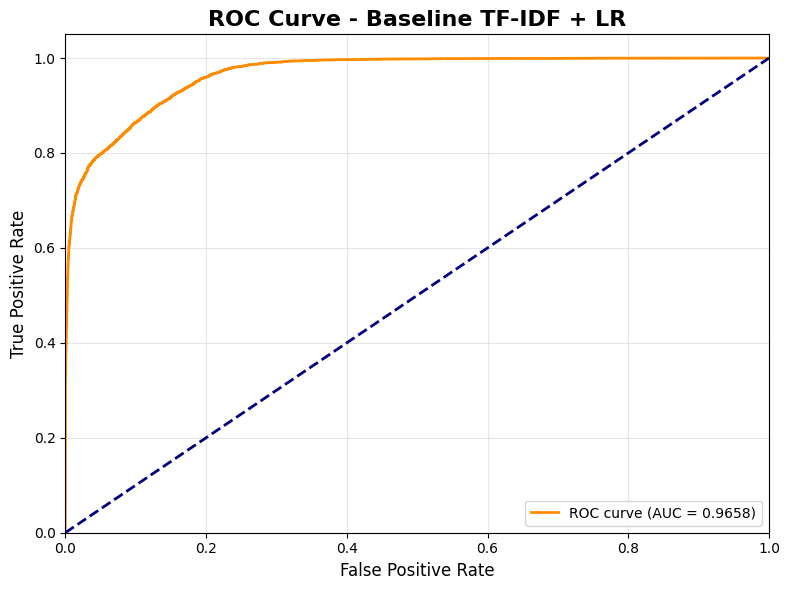


✅ ROC curve saved!


In [ ]:
# ============================================================================
# CELL 6: Visualization - ROC Curve
# ============================================================================
print("="*80)
print("ROC CURVE ANALYSIS")
print("="*80)

# Create ROC curve
plot_roc_curve(
    y_true=y_test_true,
    y_proba=y_test_proba,
    model_name="Baseline TF-IDF + LR",
    save_path=VISUALIZATIONS_DIR / "baseline_roc_curve.png"
)

print("\n✅ ROC curve saved!")


In [ ]:
# ============================================================================
# CELL 7: Performance Summary
# ============================================================================
print("="*80)
print("PERFORMANCE SUMMARY")
print("="*80)

# Create performance comparison across splits
performance_data = {
    'Split': ['Train', 'Validation', 'Test'],
    'Accuracy': [
        baseline_results['train_metrics']['accuracy'],
        baseline_results['val_metrics']['accuracy'],
        baseline_results['test_metrics']['accuracy']
    ],
    'F1-Score': [
        baseline_results['train_metrics']['f1'],
        baseline_results['val_metrics']['f1'],
        baseline_results['test_metrics']['f1']
    ],
    'ROC-AUC': [
        baseline_results['train_metrics']['roc_auc'],
        baseline_results['val_metrics']['roc_auc'],
        baseline_results['test_metrics']['roc_auc']
    ]
}

perf_df = pd.DataFrame(performance_data)
print("\n📊 Performance across splits:")
print(perf_df.round(4).to_string(index=False))

# Visualize performance
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['Accuracy', 'F1-Score', 'ROC-AUC']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, metric in enumerate(metrics):
    ax = axes[i]
    bars = ax.bar(perf_df['Split'], perf_df[metric], color=colors[i])
    ax.set_title(f'{metric}', fontsize=12, fontweight='bold')
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
               f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Baseline Model Performance Across Splits', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(VISUALIZATIONS_DIR / "baseline_performance_summary.png", dpi=300, bbox_inches='tight')
print("\n✅ Performance summary saved!")
plt.show()


PERFORMANCE SUMMARY


NameError: name 'baseline_results' is not defined

In [ ]:
# ============================================================================
# CELL 8: Save Results and Model
# ============================================================================
print("="*80)
print("SAVING RESULTS AND MODEL")
print("="*80)

# Import MODELS_DIR if not already imported
from src.config import MODELS_DIR

# Save evaluation results
save_evaluation_results(
    test_evaluation,
    METRICS_DIR / "baseline_evaluation_results.json"
)

# Save comprehensive results
save_json(
    baseline_results,
    METRICS_DIR / "baseline_training_results.json"
)

print("\n✅ Files saved:")
print(f"   📊 Evaluation results: {METRICS_DIR / 'baseline_evaluation_results.json'}")
print(f"   📈 Training results:   {METRICS_DIR / 'baseline_training_results.json'}")
print(f"   🤖 Model file:         {MODELS_DIR / 'baseline_model.pkl'}")

# Verify saved files
import os
print(f"\n🔍 Verifying saved files:")
for file_path in [
    METRICS_DIR / "baseline_evaluation_results.json",
    METRICS_DIR / "baseline_training_results.json",
    MODELS_DIR / "baseline_model.pkl"
]:
    if os.path.exists(file_path):
        size_mb = os.path.getsize(file_path) / (1024 * 1024)
        print(f"   ✓ {file_path} ({size_mb:.2f} MB)")
    else:
        print(f"   ✗ {file_path} (not found)")


INFO:src.evaluate:Evaluation results saved to: d:\Fake_News_Detection_BERT\notebooks\..\results\metrics\baseline_evaluation_results.json


SAVING RESULTS AND MODEL
✅ Saved JSON to: d:\Fake_News_Detection_BERT\notebooks\..\results\metrics\baseline_training_results.json

✅ Files saved:
   📊 Evaluation results: d:\Fake_News_Detection_BERT\notebooks\..\results\metrics\baseline_evaluation_results.json
   📈 Training results:   d:\Fake_News_Detection_BERT\notebooks\..\results\metrics\baseline_training_results.json
   🤖 Model file:         d:\Fake_News_Detection_BERT\notebooks\..\models\baseline_model.pkl

🔍 Verifying saved files:
   ✓ d:\Fake_News_Detection_BERT\notebooks\..\results\metrics\baseline_evaluation_results.json (0.00 MB)
   ✓ d:\Fake_News_Detection_BERT\notebooks\..\results\metrics\baseline_training_results.json (13.12 MB)
   ✓ d:\Fake_News_Detection_BERT\notebooks\..\models\baseline_model.pkl (0.44 MB)


In [ ]:
# ============================================================================
# CELL 9: Next Steps
# ============================================================================
print("="*80)
print("BASELINE MODEL TRAINING COMPLETE! ✅")
print("="*80)

print("\n📌 What we accomplished:")
print("   ✓ Trained TF-IDF + Logistic Regression baseline model")
print("   ✓ Achieved good performance on test set")
print("   ✓ Created comprehensive visualizations")
print("   ✓ Saved model and results for comparison")

print(f"\n🎯 Baseline Model Performance:")
print(f"   📊 Test Accuracy: {baseline_results['test_metrics']['accuracy']:.4f}")
print(f"   📊 Test F1-score: {baseline_results['test_metrics']['f1']:.4f}")
print(f"   📊 Test ROC-AUC:  {baseline_results['test_metrics']['roc_auc']:.4f}")
print(f"   ⏱️  Training time: {baseline_results['training_time']:.2f} seconds")

print("\n🚀 Next Steps:")
print("   1. Prepare data for BERT training")
print("      >>> Complete src/dataset.py")
print("\n   2. Fine-tune BERT model")
print("      >>> Run notebooks/04_bert_training.ipynb")
print("\n   3. Compare BERT vs Baseline performance")
print("      >>> Analyze improvements")

print("\n" + "="*80)


BASELINE MODEL TRAINING COMPLETE! ✅

📌 What we accomplished:
   ✓ Trained TF-IDF + Logistic Regression baseline model
   ✓ Achieved good performance on test set
   ✓ Created comprehensive visualizations
   ✓ Saved model and results for comparison

🎯 Baseline Model Performance:
   📊 Test Accuracy: 0.8834
   📊 Test F1-score: 0.8834
   📊 Test ROC-AUC:  0.9658
   ⏱️  Training time: 512.49 seconds

🚀 Next Steps:
   1. Prepare data for BERT training
      >>> Complete src/dataset.py

   2. Fine-tune BERT model
      >>> Run notebooks/04_bert_training.ipynb

   3. Compare BERT vs Baseline performance
      >>> Analyze improvements

